# Scipy

Use o `scipy` para escolher os intervalos de valores para cada parametro.

`scipy.stats.randint(a, b+1):` para hiperparâmetros com valores discretos variando de a até b, e todos os valores nesse intervalo parecem igualmente prováveis.
`scipy.stats.uniform(a, b):` é muito semelhante, mas para hiperparâmetros contínuos.
scipy.stats.geom(1 / scale): para valores discretos, quando você deseja amostrar aproximadamente em uma determinada escala. Por exemplo, com escala = 1000, a maioria das amostras estará neste estágio, mas ~10% de todas as amostras serão <100 e ~10% serão >2300.   
`scipy.stats.expon(scale):` este é o equivalente contínuo de geom. Basta definir a escala para o valor mais provável.
`scipy.stats.loguniform(a, b):` quando você quase não tem ideia de qual é a escala de valor de hiperparâmetro ideal. Se você definir a=0,01 e b=100, terá a mesma probabilidade de amostrar um valor entre 0,01 e 0,1 como um valor entre 10 e 100.

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import randint, uniform, geom, expon
import numpy as np

In [79]:
# Para valores discretos (0,1,2,3, ..., n):
randint_distrib = np.arange(0, 21)
randint_distrib = randint(low=0, high=21)

In [87]:
# Para valores reais com distribuição uniformes 
uniform_distrib = np.random.uniform(low=0, high=1, size=10)
uniform_distrib = uniform(0, 1)

In [88]:
# Para valores reais com distribuição exponencial
expon_distrib = np.unique(np.random.exponential(scale=1, size=10))
expon_distrib = expon(scale=1)

In [131]:
# Para valores reais com distribuição geometrica
geom_distrib = np.unique(np.random.geometric(p=0.6, size=10))
geom_distrib = geom(0.5)

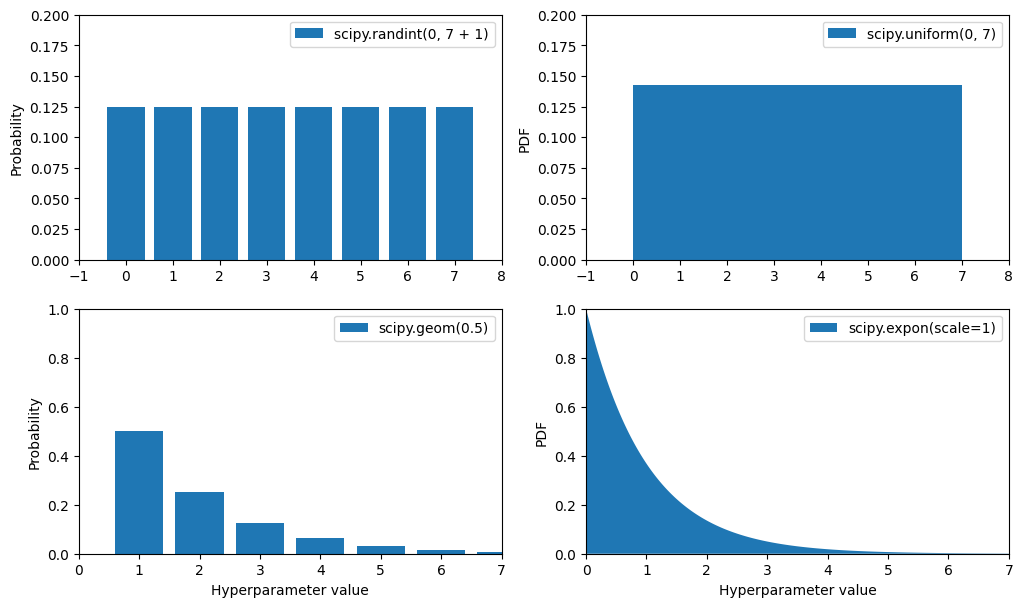

In [147]:
xs1 = np.arange(0, 7 + 1)
randint_distrib = randint(0, 7 + 1).pmf(xs1)

xs2 = np.linspace(0, 7, 500)
uniform_distrib = uniform(0, 7).pdf(xs2)

xs3 = np.arange(0, 7 + 1)
geom_distrib = geom(0.5).pmf(xs3)

xs4 = np.linspace(0, 7, 500)
expon_distrib = expon(scale=1).pdf(xs4)

plt.figure(figsize=(12, 7))

plt.subplot(2, 2, 1)
plt.bar(xs1, randint_distrib, label="scipy.randint(0, 7 + 1)")
plt.ylabel("Probability")
plt.legend()
plt.axis([-1, 8, 0, 0.2])

plt.subplot(2, 2, 2)
plt.fill_between(xs2, uniform_distrib, label="scipy.uniform(0, 7)")
plt.ylabel("PDF")
plt.legend()
plt.axis([-1, 8, 0, 0.2])

plt.subplot(2, 2, 3)
plt.bar(xs3, geom_distrib, label="scipy.geom(0.5)")
plt.xlabel("Hyperparameter value")
plt.ylabel("Probability")
plt.legend()
plt.axis([0, 7, 0, 1])

plt.subplot(2, 2, 4)
plt.fill_between(xs4, expon_distrib, label="scipy.expon(scale=1)")
plt.xlabel("Hyperparameter value")
plt.ylabel("PDF")
plt.legend()
plt.axis([0, 7, 0, 1])

plt.show()